## Exploratory Data Analysis

1. Summary Statistics.
        - That standard deviation

3. Investigate trends in the data.
    - Using sorting and/or masking, consider questions relevant to your problem statement:
        - Which districts/counties have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which districts/counties have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any districts/counties with 100% participation on a given test have a rate change year-to-year?
        - Do any districts/counties show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **Find comments on findings at each step in a markdown cell below each code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [1]:
# Imports:
import numpy as np
import pandas as pd
from random import randint
import matplotlib.pyplot as plt
import seaborn as sns

# Load 

In [2]:
sd = {column: std_dev(finaldf[column]) for column in list(finaldf.columns)  if finaldf[column].dtypes == 'int64' or finaldf[column].dtypes == 'float64'}

NameError: name 'finaldf' is not defined

In [ ]:
#I wanted a dictionary mapping school districts to state counties to investigate higher-level statistics. The Equity data set did not have 
distcount_dict = {}
for row in actdf.index:
    #print(row)
    c = actdf['CName'][row]
    d = actdf['DName'][row]
    #print(c)
    #print(d)
    if c in distcount_dict:
        if d not in distcount_dict[c]:
            distcount_dict[c].append(d)
    else:
        #distcount_dict[c] = set([d])
        #distcount_dict.update({c:d}) 
        distcount_dict.update({c:[d]})
distcount_dict.keys()   
distcount_dict.get('Riverside')
act_districtdf['county_name'].sort_values().unique()

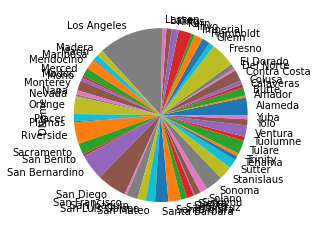

In [8]:
# EDA: Create visual
# Disply the number of School Districts in each of the 58 counties
%store -r actdf
district = actdf[actdf['RType']=='D']
d = district.groupby('CName')['DName'].count()
d.plot.pie()

In [ ]:
#EDA
finaldf['bench_over_enrolled'] = finaldf['num_over_benchmark_sat']/finaldf['enrolled_seniors_x']
finaldf[finaldf['bench_over_enrolled']>.44]

**The school with the highest rate of seniors enrolled performing above avg on the SAT is almost 45%**:
- The average is MUCH lower at almost 16%.
- La Canada Unified School District in LA County scored 141.78 in Equity, way above average!

In [ ]:
finaldf[finaldf['num_over_benchmark_act']>2000]
finaldf[finaldf['num_over_benchmark_sat']>2000]

**Los Angeles Unified School District is by far the largest**:
- It would be interesting to look at schools within the district for performance and see what the variation is in performance.

In [ ]:
#Code:
#Combine enrollment and test-taking numbers to calc participation percentages for ease of comparison
act_districtdf['percent_participation'] = round((act_districtdf['tested_seniors']/act_districtdf['enrolled_seniors']),4)
sat_districtdf['percent_participation'] = round((sat_districtdf['tested_seniors']/sat_districtdf['enrolled_seniors']),4)

#Identify issue with interpretation of dataset. Total No. of test takers shoud not exceed No. of seniors
print(act_districtdf[act_districtdf['percent_participation']>100]) #actdf.index == [1400, 1504, 1601] > 100% participation!
print(actdf[actdf.index == 1400])
print(sat_districtdf[sat_districtdf['percent_participation']>=100]) #SAT data checks out

**Participation of Seniors in taking standardized tests**:
- ACT data set has unusual information with numbers resulting in greater than 100% participation.
- SAT data set does not have the same issue as the ACT data

In [ ]:
#Scores above benchmark threshold DataFrames
print(finaldf[['score','pct_over_benchmark_sat','pct_over_benchmark_act','rank']].sort_values('rank').tail(10))
print(finaldf[['pct_over_benchmark_sat','pct_over_benchmark_act']].describe())

**All 10 of the Least Equitable School Districts Have High Scoring Seniors**:
- On avg 55.9% of test takers scored above 21 on the composite ACT, but the 10 most equitable schools have higher avg percent
- On avg 48.5% of test takers scored above benchmark on the combined SAT, but the 10 most equitable schools have higher avg percent scoring above that.

Heatmap and EDA visualizations before notebook 3